### Essential Libraries
> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization 
> Dython : Library with Data Analysis Tools

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from dython.nominal import identify_nominal_columns
from dython.nominal import associations
sb.set()
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Import Dataset
> Dataset from Kaggle : Behavioral Risk Factor Surveillance System  
> Source: https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system

In [2]:
csv_Data = pd.read_csv('2015.csv')
csv_Data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,88.0,3.0,2.0,280.0,510.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,b'',b'',3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0,4.0,2.0,1.0,2.0

In [3]:
csv_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


### Variables required for analysis


In [4]:
Data = pd.DataFrame(csv_Data[['SCNTMEL1', 'SCNTMNY1', 'MENTHLTH', 'MISTMNT', 'ADMOVE', 'ADTHINK', 'ADFAIL', 'ADEAT1', 
                              'ADENERGY', 'ADSLEEP', 'ADDOWN', 'ADPLEASR', 'LMTJOIN3', '_BMI5CAT', '_BMI5', 'INCOME2', 
                              '_AGEG5YR', 'SEX', 'DRADVISE', 'WTCHSALT', '_TOTINDA', 'EXRACT11', 'STRENGTH', 'EXERHMM1', 
                              'EXEROFT1', '_VEGLT1', '_FRTLT1', 'VEGETAB1', 'FVORANG', 'FVGREEN', 'FVBEANS', 'FRUIT1', 
                              'FRUITJU1', '_RFDRHV5', '_DRNKWEK', '_SMOKER3', '_CHOLCHK', '_RFHYPE5', 'TOLDHI2', 
                              'BPHIGH4', 'ADDEPEV2', 'ADANXEV', '_DRDXAR1', '_MICHD', 'CVDSTRK3', 'CVDCRHD4', 'CVDINFR4', 
                              'CHCKIDNY', 'PREDIAB1', 'DIABETE3', 'ASTHMA3', 'CHCCOPD1', 'EMPLOY1', 'VETERAN3', 
                              'CHILDREN', 'INTERNET', 'MARITAL', 'EDUCA', 'PREGNANT']])
Data.shape

(441456, 59)

----
# Relationship between demographic information and mental health
> - Gender  
> - Age
> - Martial Status
> - Education Level
> - Number of Children
> - Income Level

In [5]:
# Create Dataframe with Relevant Columns
MentalHealth_Data = pd.DataFrame(Data[['SEX', '_AGEG5YR', 'MARITAL', 'EDUCA', 'EMPLOY1', 'CHILDREN', 'INCOME2', 
                                       'ADDEPEV2', 'ADANXEV']])
MentalHealth_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEX       441456 non-null  float64
 1   _AGEG5YR  441456 non-null  float64
 2   MARITAL   441456 non-null  float64
 3   EDUCA     441456 non-null  float64
 4   EMPLOY1   441456 non-null  float64
 5   CHILDREN  441451 non-null  float64
 6   INCOME2   438155 non-null  float64
 7   ADDEPEV2  441456 non-null  float64
 8   ADANXEV   20342 non-null   float64
dtypes: float64(9)
memory usage: 30.3 MB


### Clean Data
> - Rename Columns  
> - Remove null rows  
> - Remove rows with 'Refused' or 'Unsure'  
> - Re-label numbers to actual label 
> - Combine anxiety and depression diagnosis to a single mental_illness variable

In [6]:
# Rename Columns
cols = ['sex', 'age', 'married', 'education', 'employment', 'children', 'income_level', 
        'diagnosed_depression', 'diagnosed_anxiety']
MentalHealth_Data.columns = cols

# Remove null rows
MentalHealth_Data = MentalHealth_Data.dropna()

In [7]:
# Remove rows with 'Refused' and 'Unsure' responses
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.age != 14)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.married != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.education != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.employment != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.children != 99)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.income_level != 77)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.income_level != 99)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_depression != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_depression != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_anxiety != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_anxiety != 7)]

# Change rows with 88 to 0 children
MentalHealth_Data.loc[MentalHealth_Data.children == 88, 'children'] = 0
# Combine those with 5 or more children into a single category
MentalHealth_Data.loc[MentalHealth_Data.children > 4, 'children'] = 5

MentalHealth_Data = MentalHealth_Data.astype('category')

In [8]:
# Re-label numbers to proper category label names
MentalHealth_Data['sex'] = MentalHealth_Data['sex'].cat.rename_categories({1: 'Male', 2: 'Female'})
MentalHealth_Data['age'] = MentalHealth_Data['age'].cat.rename_categories({1: '18 - 24', 2: '25 - 29', 3: '30 - 34', 
                                                                     4: '35 - 39', 5: '40 - 44', 6: '45 - 49', 
                                                                     7: '50 - 54', 8: '55 - 59', 9: '60 - 64', 
                                                                     10: '65 - 69', 11: '70 - 74', 12: '75 - 79', 
                                                                     13: 'Older than 80'})
MentalHealth_Data['married'] = MentalHealth_Data['married'].cat.rename_categories({1: 'Married', 2: 'Divorced', 
                                                                                   3: 'Widowed', 4: 'Separated', 
                                                                                   5: 'Never Married', 
                                                                                   6: 'Relationship'})
MentalHealth_Data['education'] = MentalHealth_Data['education'].cat.rename_categories({1: 'Never attended / kindergarten', 
                                                                                       2: 'Grade 1 - 8', 
                                                                                       3: 'Grade 9 - 11', 
                                                                                       4: 'Grade 12 / High School Graduate', 
                                                                                       5: 'College Year 1 - 3', 
                                                                                       6: 'College Year 4 or more'})
MentalHealth_Data['employment'] = MentalHealth_Data['employment'].cat.rename_categories({1: 'Employed for wages', 
                                                                                         2: 'Self-employed', 
                                                                                         3: 'Out of work (>= 1 year)', 
                                                                                         4: 'Out of work (< 1 year)', 
                                                                                         5: 'Homemaker', 
                                                                                         6: 'Student', 
                                                                                         7: 'Retired', 
                                                                                         8: 'Unable to work'})
MentalHealth_Data['income_level'] = MentalHealth_Data['income_level'].cat.rename_categories({1: '< $10,000', 
                                                                                             2: '$10,000 - $14,999', 
                                                                                             3: '$15,000 - $19,999', 
                                                                                             4: '$20,000 - $24,999', 
                                                                                             5: '$25,000 - $34,999', 
                                                                                             6: '$35,000 - $49,999', 
                                                                                             7: '$50,000 - $74,999', 
                                                                                             8: '>= $75,000'})
MentalHealth_Data['children'] = MentalHealth_Data['children'].cat.rename_categories({0: 'No Children', 
                                                                                     1: '1 Child', 
                                                                                     2: '2 Children', 
                                                                                     3: '3 Children', 
                                                                                     4: '4 Children', 
                                                                                     5: '> 5 Children'})
MentalHealth_Data['diagnosed_depression'] = MentalHealth_Data['diagnosed_depression'].cat.rename_categories({1: 'Yes', 2: 'No'})
MentalHealth_Data['diagnosed_anxiety'] = MentalHealth_Data['diagnosed_anxiety'].cat.rename_categories({1: 'Yes', 2: 'No'})

In [9]:
# If person has either depression or anxiety, mark as 'Yes' in new mental_illness column
MentalHealth_Data["mental_illness"] = np.nan
MentalHealth_Data['mental_illness'] = np.where(((MentalHealth_Data['diagnosed_depression'] == 'Yes') | 
                                               (MentalHealth_Data['diagnosed_anxiety'] == 'Yes')), 'Yes', 'No')
MentalHealth_Data = MentalHealth_Data.drop(columns=['diagnosed_depression', 'diagnosed_anxiety'])
MentalHealth_Data["mental_illness"] = MentalHealth_Data["mental_illness"].astype('category')

In [10]:
MentalHealth_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16514 entries, 209336 to 422701
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   sex             16514 non-null  category
 1   age             16514 non-null  category
 2   married         16514 non-null  category
 3   education       16514 non-null  category
 4   employment      16514 non-null  category
 5   children        16514 non-null  category
 6   income_level    16514 non-null  category
 7   mental_illness  16514 non-null  category
dtypes: category(8)
memory usage: 260.3 KB


### Individual Variable's Statistical Visualisation

In [11]:
MentalHealth_Data.describe()

,sex,age,married,education,employment,children,income_level,mental_illness
count,16514,16514,16514,16514,16514,16514,16514,16514
unique,2,13,6,6,8,6,8,2
top,Female,60 - 64,Married,College Year 4 or more,Employed for wages,No Children,">= $75,000",No
freq,9548,2051,8806,5197,6521,12293,4245,12197


<AxesSubplot:xlabel='income_level'>

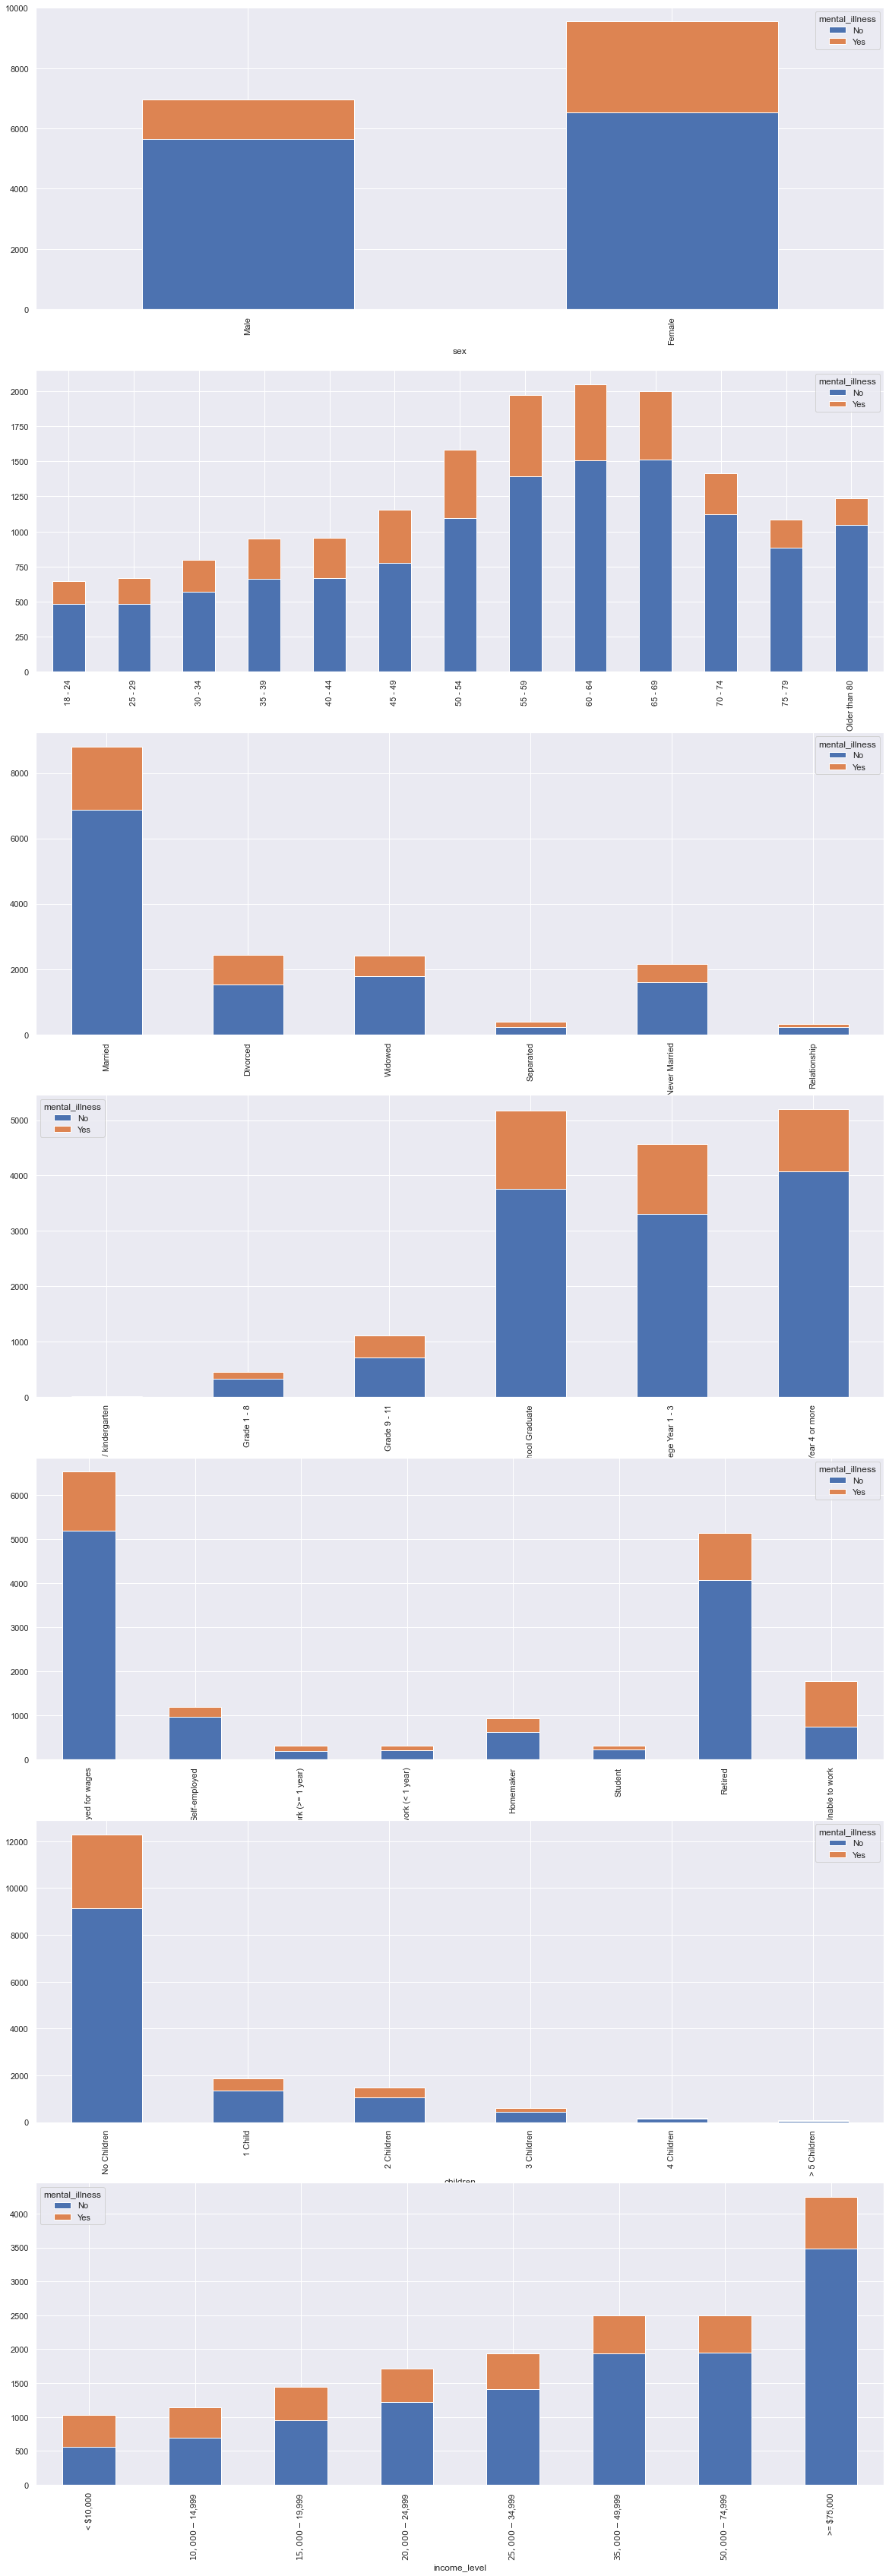

In [12]:
f, axes = plt.subplots(7, 1, figsize=(20, 60))

MentalHealth_Data.groupby(['sex', 'mental_illness']).size().reset_index().pivot(columns='mental_illness', index='sex', values=0).plot(kind='bar', stacked=True, ax=axes[0])
MentalHealth_Data.groupby(['age', 'mental_illness']).size().reset_index().pivot(columns='mental_illness', index='age', values=0).plot(kind='bar', stacked=True, ax=axes[1])
MentalHealth_Data.groupby(['married', 'mental_illness']).size().reset_index().pivot(columns='mental_illness', index='married', values=0).plot(kind='bar', stacked=True, ax=axes[2])
MentalHealth_Data.groupby(['education', 'mental_illness']).size().reset_index().pivot(columns='mental_illness', index='education', values=0).plot(kind='bar', stacked=True, ax=axes[3])
MentalHealth_Data.groupby(['employment', 'mental_illness']).size().reset_index().pivot(columns='mental_illness', index='employment', values=0).plot(kind='bar', stacked=True, ax=axes[4])
MentalHealth_Data.groupby(['children', 'mental_illness']).size().reset_index().pivot(columns='mental_illness', index='children', values=0).plot(kind='bar', stacked=True, ax=axes[5])
MentalHealth_Data.groupby(['income_level', 'mental_illness']).size().reset_index().pivot(columns='mental_illness', index='income_level', values=0).plot(kind='bar', stacked=True, ax=axes[6])

### Effect of demographic information on mental health

<AxesSubplot:xlabel='income_level', ylabel='Percent'>

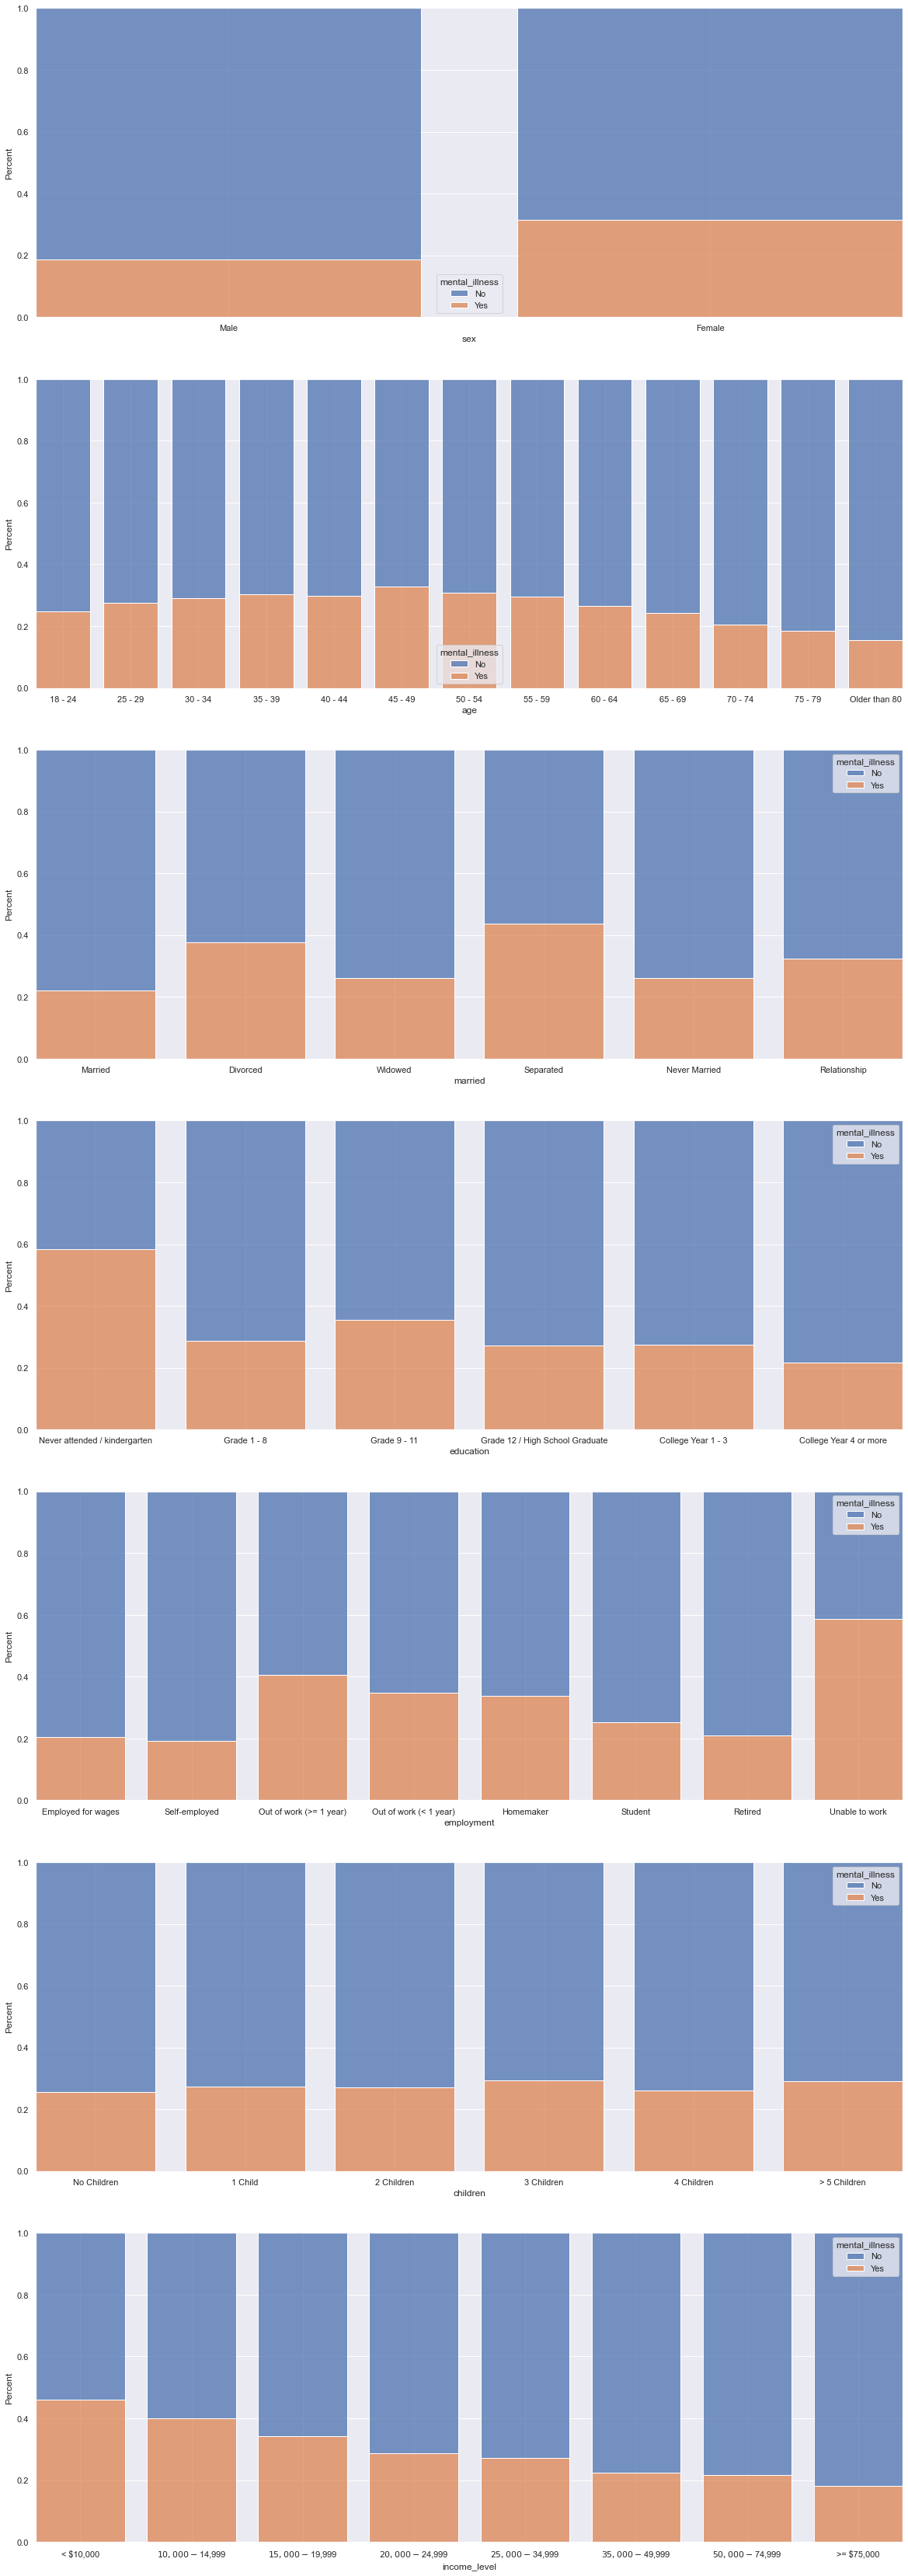

In [13]:
f, axes = plt.subplots(7, 1, figsize=(20, 60))
sb.histplot(MentalHealth_Data, x="sex", hue="mental_illness", stat="percent", multiple="fill", shrink=.8, ax=axes[0])
sb.histplot(MentalHealth_Data, x="age", hue="mental_illness", stat="percent", multiple="fill", shrink=.8, ax=axes[1])
sb.histplot(MentalHealth_Data, x="married", hue="mental_illness", stat="percent", multiple="fill", shrink=.8, ax=axes[2])
sb.histplot(MentalHealth_Data, x="education", hue="mental_illness", stat="percent", multiple="fill", shrink=.8, ax=axes[3])
sb.histplot(MentalHealth_Data, x="employment", hue="mental_illness", stat="percent", multiple="fill", shrink=.8, ax=axes[4])
sb.histplot(MentalHealth_Data, x="children", hue="mental_illness", stat="percent", multiple="fill", shrink=.8, ax=axes[5])
sb.histplot(MentalHealth_Data, x="income_level", hue="mental_illness", stat="percent", multiple="fill", shrink=.8, ax=axes[6])

----
# Most commonly experienced symptom of poor mental health

In [14]:
# Create Dataframe with Relevant Columns
MentalHealth_Data = pd.DataFrame(Data[['ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK',
                                       'ADMOVE', 'MISTMNT', 'MENTHLTH', 'SCNTMNY1', 'SCNTMEL1', '_RFDRHV5', 
                                       'ADDEPEV2', 'ADANXEV']])
MentalHealth_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ADPLEASR  20445 non-null   float64
 1   ADDOWN    20429 non-null   float64
 2   ADSLEEP   20419 non-null   float64
 3   ADENERGY  20413 non-null   float64
 4   ADEAT1    20402 non-null   float64
 5   ADFAIL    20395 non-null   float64
 6   ADTHINK   20381 non-null   float64
 7   ADMOVE    20365 non-null   float64
 8   MISTMNT   20350 non-null   float64
 9   MENTHLTH  441456 non-null  float64
 10  SCNTMNY1  69502 non-null   float64
 11  SCNTMEL1  73360 non-null   float64
 12  _RFDRHV5  441456 non-null  float64
 13  ADDEPEV2  441456 non-null  float64
 14  ADANXEV   20342 non-null   float64
dtypes: float64(15)
memory usage: 50.5 MB


### Clean Data
> - Rename Columns  
> - Remove null rows  
> - Remove rows with 'Refused' or 'Unsure'  
> - Re-label numbers to actual label 
> - Combine anxiety and depression diagnosis to a single mental_illness variable

In [15]:
# Rename Columns
cols = ['little_pleasure', 'down_or_depressed', 'sleep_troubles', 'tired', 'eating_habits', 'failure', 
         'concentration','slow_or_restless', 'on_medication', 'mental_health', 'stressed_abt_rent', 
         'stressed_abt_food', 'alcohol', 'diagnosed_depression', 'diagnosed_anxiety']
MentalHealth_Data.columns = cols

# Drop null rows
MentalHealth_Data = MentalHealth_Data.dropna()

In [16]:
# Remove rows with 99 - Refused and 77 - Unsure
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.little_pleasure != 99)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.little_pleasure != 77)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.down_or_depressed != 99)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.down_or_depressed != 77)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.sleep_troubles != 99)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.sleep_troubles != 77)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.tired != 99)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.tired != 77)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.eating_habits != 99)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.eating_habits != 77)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.failure != 99)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.failure != 77)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.concentration != 99)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.concentration != 77)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.slow_or_restless != 99)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.slow_or_restless != 77)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.mental_health != 99)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.mental_health != 77)]

# Remove rows with 9 - Refused, 8 - Not applicable and 7 - Unsure
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.on_medication != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.on_medication != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.stressed_abt_rent != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.stressed_abt_rent != 8)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.stressed_abt_rent != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.stressed_abt_food != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.stressed_abt_food != 8)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.stressed_abt_food != 7)]
MentalHealth_Data = MentalHealth_Data[MentalHealth_Data.alcohol != 9]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_depression != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_depression != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_anxiety != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_anxiety != 7)]

In [17]:
# 1 - 14 days felt little pleasure in doing things - 'Yes' else 'No'
MentalHealth_Data['little_pleasure'] = np.where(MentalHealth_Data['little_pleasure'] < 88, 'Yes', 'No')
# 1 - 14 days felt down or depressed - 'Yes' else 'No'
MentalHealth_Data['down_or_depressed'] = np.where(MentalHealth_Data['down_or_depressed'] < 88, 'Yes', 'No')
# 1 - 14 days had trouble sleeping - 'Yes' else 'No'
MentalHealth_Data['sleep_troubles'] = np.where(MentalHealth_Data['sleep_troubles'] < 88, 'Yes', 'No')
# 1 - 14 days felt tired or little energy - 'Yes' else 'No'
MentalHealth_Data['tired'] = np.where(MentalHealth_Data['tired'] < 88, 'Yes', 'No')
# 1 - 14 days ate too little or too much - 'Yes' else 'No'
MentalHealth_Data['eating_habits'] = np.where(MentalHealth_Data['eating_habits'] < 88, 'Yes', 'No')
# 1 - 14 days felt like failure or let family down - 'Yes' else 'No'
MentalHealth_Data['failure'] = np.where(MentalHealth_Data['failure'] < 88, 'Yes', 'No')
# 1 - 14 days trouble concentrating - 'Yes' else 'No'
MentalHealth_Data['concentration'] = np.where(MentalHealth_Data['concentration'] < 88, 'Yes', 'No')
# 1 - 14 days moved or spoken slowly or fidgety or restless - 'Yes' else 'No'
MentalHealth_Data['slow_or_restless'] = np.where(MentalHealth_Data['slow_or_restless'] < 88, 'Yes', 'No')
# On medication or treatment from health professional - 'Yes' else 'No'
MentalHealth_Data['on_medication'] = np.where(MentalHealth_Data['on_medication'] < 2, 'Yes', 'No')
# 1 - 30 Days experiencing stress/depression/emotional problems - 'Yes' else 'No'
MentalHealth_Data['mental_health'] = np.where(MentalHealth_Data['mental_health'] < 88, 'Yes', 'No')
# Always, Usually, Sometimes, Rarely - 'Yes' else 'No'
MentalHealth_Data['stressed_abt_rent'] = np.where(MentalHealth_Data['stressed_abt_rent'] < 5, 'Yes', 'No')
# Always, Usually, Sometimes, Rarely - 'Yes' else 'No'
MentalHealth_Data['stressed_abt_food'] = np.where(MentalHealth_Data['stressed_abt_food'] < 5, 'Yes', 'No')
# 1 - No, 2 - Yes
MentalHealth_Data['alcohol'] = np.where(MentalHealth_Data['alcohol'] < 2, 'No', 'Yes')
# 1 - Yes, 2 - No
MentalHealth_Data['diagnosed_depression'] = np.where(MentalHealth_Data['diagnosed_depression'] < 2, 'Yes', 'No')
# 1 - Yes, 2 - No
MentalHealth_Data['diagnosed_anxiety'] = np.where(MentalHealth_Data['diagnosed_anxiety'] < 2, 'Yes', 'No')

In [18]:
# If person has either depression or anxiety, mark as 'Yes' in new mental_illness column
MentalHealth_Data["mental_illness"] = np.nan
MentalHealth_Data['mental_illness'] = np.where(((MentalHealth_Data['diagnosed_depression'] == 'Yes') | 
                                               (MentalHealth_Data['diagnosed_anxiety'] == 'Yes')), 'Yes', 'No')
MentalHealth_Data = MentalHealth_Data.drop(columns=['diagnosed_depression', 'diagnosed_anxiety'])

In [19]:
MentalHealth_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7880 entries, 209337 to 359368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   little_pleasure    7880 non-null   object
 1   down_or_depressed  7880 non-null   object
 2   sleep_troubles     7880 non-null   object
 3   tired              7880 non-null   object
 4   eating_habits      7880 non-null   object
 5   failure            7880 non-null   object
 6   concentration      7880 non-null   object
 7   slow_or_restless   7880 non-null   object
 8   on_medication      7880 non-null   object
 9   mental_health      7880 non-null   object
 10  stressed_abt_rent  7880 non-null   object
 11  stressed_abt_food  7880 non-null   object
 12  alcohol            7880 non-null   object
 13  mental_illness     7880 non-null   object
dtypes: object(14)
memory usage: 923.4+ KB


### Statistical Visualisation of Variables

In [20]:
MentalHealth_Data.describe()

,little_pleasure,down_or_depressed,sleep_troubles,tired,eating_habits,failure,concentration,slow_or_restless,on_medication,mental_health,stressed_abt_rent,stressed_abt_food,alcohol,mental_illness
count,7880,7880,7880,7880,7880,7880,7880,7880,7880,7880,7880,7880,7880,7880
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No
freq,5438,5857,4305,4821,5102,6583,6746,6972,6797,5635,4230,5175,7597,5984


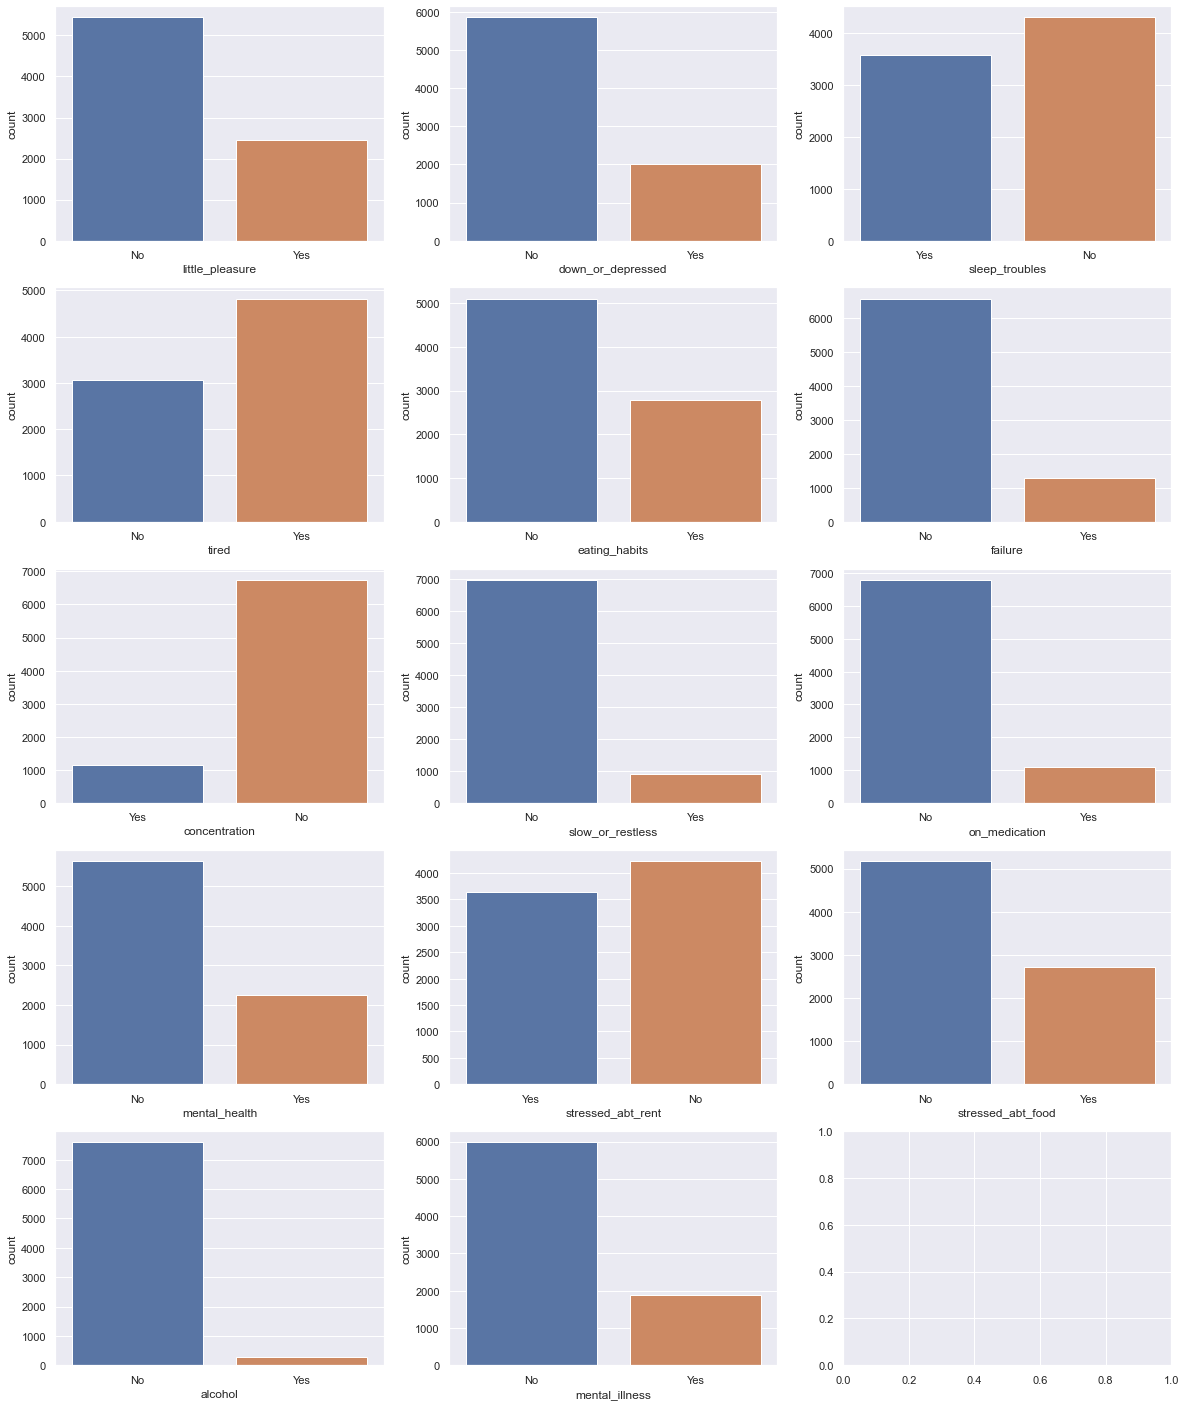

In [21]:
cols = ['little_pleasure', 'down_or_depressed', 'sleep_troubles', 'tired', 'eating_habits', 'failure', 
         'concentration','slow_or_restless', 'on_medication', 'mental_health', 'stressed_abt_rent', 
         'stressed_abt_food', 'alcohol', 'mental_illness']

fig, ax = plt.subplots(5, 3, figsize=(20, 25))
for variable, subplot in zip(cols, ax.flatten()):
    sb.countplot(x = variable, data = MentalHealth_Data, ax=subplot)

### Most commonly experienced by people with poor mental health

In [22]:
value = []

for col_name in MentalHealth_Data.columns:
    No_of_people = ((MentalHealth_Data[col_name] == 'Yes') 
                    & (MentalHealth_Data['mental_illness'] == 'Yes')).sum()
    value.append(No_of_people)
    
No_of_people = pd.DataFrame({
    'group': MentalHealth_Data.columns,
    'value': value
})

No_of_people = No_of_people[(No_of_people.group != 'mental_illness')]
No_of_people = No_of_people.sort_values(['value'], ascending=False).reset_index(drop=True)

In [23]:
No_of_people

,group,value
0,tired,1563
1,sleep_troubles,1304
2,mental_health,1175
3,stressed_abt_rent,1173
4,down_or_depressed,1092
5,little_pleasure,1061
6,eating_habits,1041
7,stressed_abt_food,999
8,on_medication,956
9,failure,734


Text(0.5, 0, 'Symptoms')

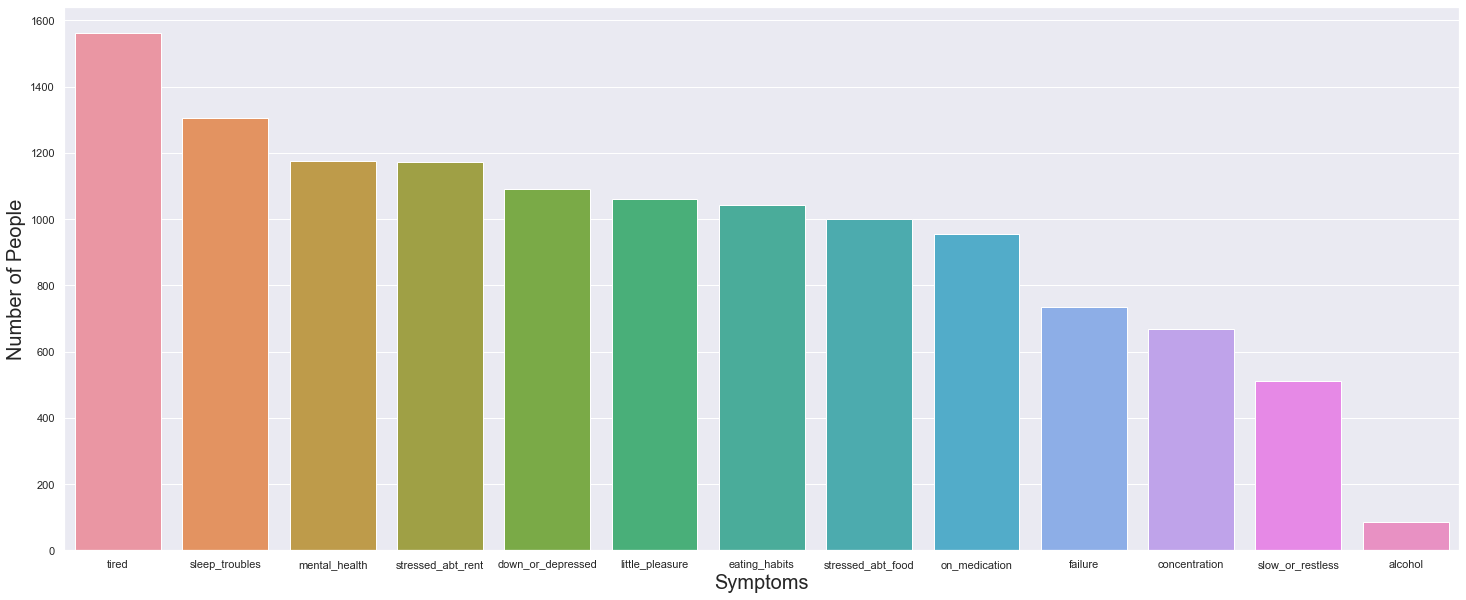

In [24]:
plt.figure(figsize=(25, 10))
p = sb.barplot(
    y = "value", 
    x = "group", 
    data = No_of_people);
p.set_ylabel("Number of People", fontsize = 20)
p.set_xlabel("Symptoms", fontsize = 20)

----
# Does poor mental health lead to other chronic illnesses?

In [25]:
### Create Dataframe with Relevant Columns
MentalHealth_Data = pd.DataFrame(Data[['CHCCOPD1', 'ASTHMA3', 'DIABETE3', 'PREDIAB1', 'CHCKIDNY', 'CVDINFR4', 
                                       'CVDCRHD4', 'CVDSTRK3', '_MICHD', '_DRDXAR1', 'ADDEPEV2', 'ADANXEV']])

# Rename Columns
cols = ['copd', 'asthma', 'diabetes', 'pre_diabetes', 'kidney_disease', 'heart_attack', 'angina', 'stroke', 
        'chd', 'arthritis', 'diagnosed_depression', 'diagnosed_anxiety']

MentalHealth_Data.columns = cols

MentalHealth_Data = MentalHealth_Data.dropna()

In [26]:
MentalHealth_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8467 entries, 353626 to 422700
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   copd                  8467 non-null   float64
 1   asthma                8467 non-null   float64
 2   diabetes              8467 non-null   float64
 3   pre_diabetes          8467 non-null   float64
 4   kidney_disease        8467 non-null   float64
 5   heart_attack          8467 non-null   float64
 6   angina                8467 non-null   float64
 7   stroke                8467 non-null   float64
 8   chd                   8467 non-null   float64
 9   arthritis             8467 non-null   float64
 10  diagnosed_depression  8467 non-null   float64
 11  diagnosed_anxiety     8467 non-null   float64
dtypes: float64(12)
memory usage: 859.9 KB


In [27]:
# Remove 9 - Refused and 7 - Unsure, Set 1 - Yes, 2 - No
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.copd != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.copd != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.asthma != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.asthma != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diabetes != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diabetes != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.pre_diabetes != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.pre_diabetes != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.kidney_disease != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.kidney_disease != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.heart_attack != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.heart_attack != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.angina != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.angina != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.stroke != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.stroke != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.arthritis != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.arthritis != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_depression != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_depression != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_anxiety != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_anxiety != 7)]

In [28]:
MentalHealth_Data['copd'] = np.where(MentalHealth_Data['copd'] < 2, 'Yes', 'No')
MentalHealth_Data['asthma'] = np.where(MentalHealth_Data['asthma'] < 2, 'Yes', 'No')
MentalHealth_Data['diabetes'] = np.where(MentalHealth_Data['diabetes'] < 3, 'Yes', 'No')
MentalHealth_Data['pre_diabetes'] = np.where(MentalHealth_Data['pre_diabetes'] < 3, 'Yes', 'No')
MentalHealth_Data['kidney_disease'] = np.where(MentalHealth_Data['kidney_disease'] < 2, 'Yes', 'No')
MentalHealth_Data['heart_attack'] = np.where(MentalHealth_Data['heart_attack'] < 2, 'Yes', 'No')
MentalHealth_Data['angina'] = np.where(MentalHealth_Data['angina'] < 2, 'Yes', 'No')
MentalHealth_Data['stroke'] = np.where(MentalHealth_Data['stroke'] < 2, 'Yes', 'No')
MentalHealth_Data['chd'] = np.where(MentalHealth_Data['chd'] < 2, 'Yes', 'No')
MentalHealth_Data['arthritis'] = np.where(MentalHealth_Data['arthritis'] < 2, 'Yes', 'No')
MentalHealth_Data['diagnosed_depression'] = np.where(MentalHealth_Data['diagnosed_depression'] < 2, 'Yes', 'No')
MentalHealth_Data['diagnosed_anxiety'] = np.where(MentalHealth_Data['diagnosed_anxiety'] < 2, 'Yes', 'No')
# If person has either depression or anxiety, mark as 'Yes' on new mental_illness column
MentalHealth_Data["mental_illness"] = np.nan
MentalHealth_Data['mental_illness'] = np.where(((MentalHealth_Data['diagnosed_depression'] == 'Yes') | 
                                               (MentalHealth_Data['diagnosed_anxiety'] == 'Yes')), 'Yes', 'No')
MentalHealth_Data = MentalHealth_Data.drop(columns=['diagnosed_depression', 'diagnosed_anxiety'])

In [29]:
MentalHealth_Data

,copd,asthma,diabetes,pre_diabetes,kidney_disease,heart_attack,angina,stroke,chd,arthritis,mental_illness
353626,No,No,No,No,No,No,No,No,No,No,No
353630,No,No,No,No,No,No,No,No,No,No,No
353631,No,No,No,No,No,No,No,No,No,Yes,No
353632,No,No,No,No,No,No,No,No,No,Yes,Yes
353634,No,Yes,No,No,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
422694,No,No,No,No,No,No,No,No,No,No,No
422695,Yes,No,No,No,No,No,Yes,No,Yes,Yes,Yes
422698,No,No,No,No,No,No,No,No,No,No,No
422699,No,No,No,No,No,No,No,No,No,No,Yes


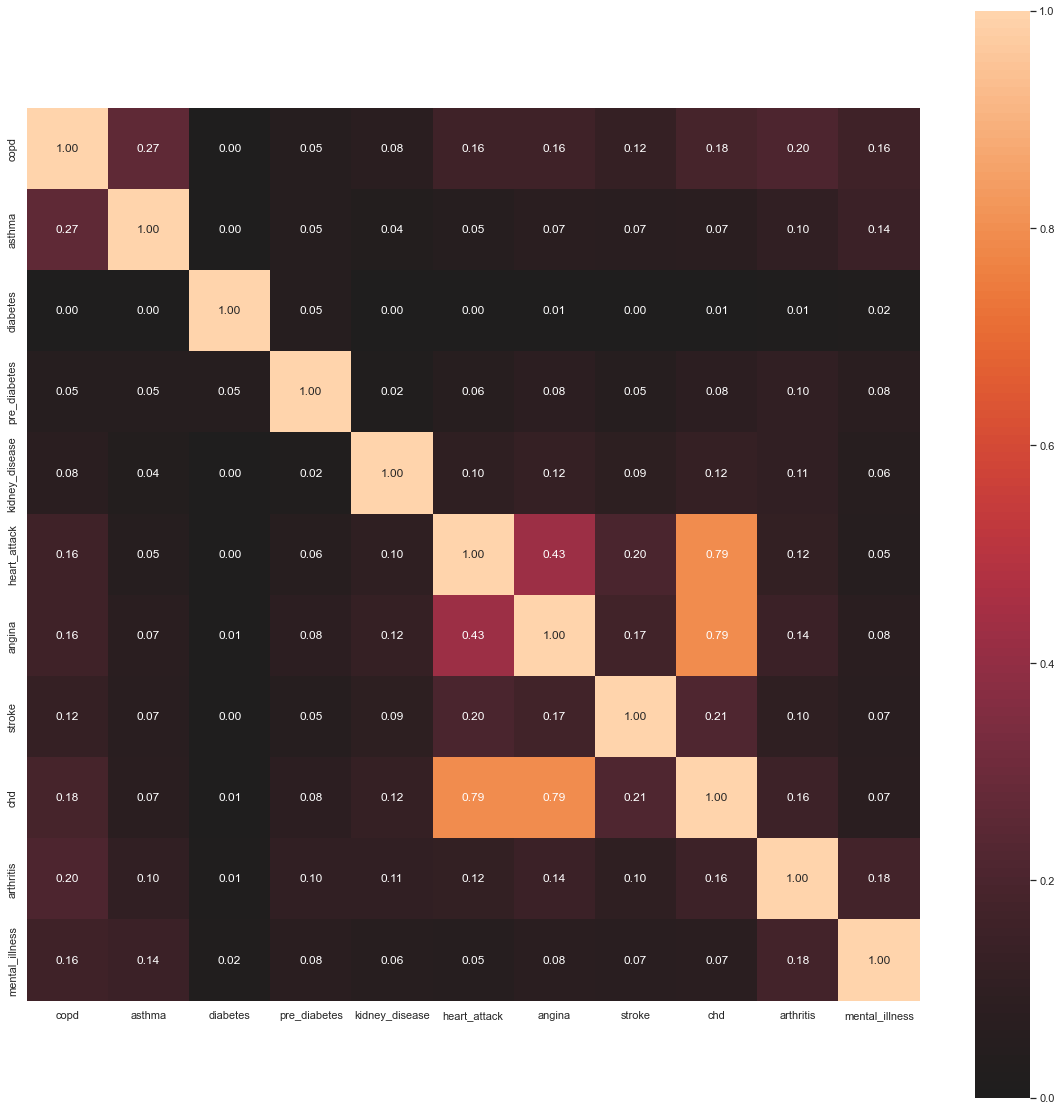

In [30]:
complete_correlation = associations(MentalHealth_Data, figsize=(20,20))

# ----------------------------------- IGNORE BELOW ------------------------------------

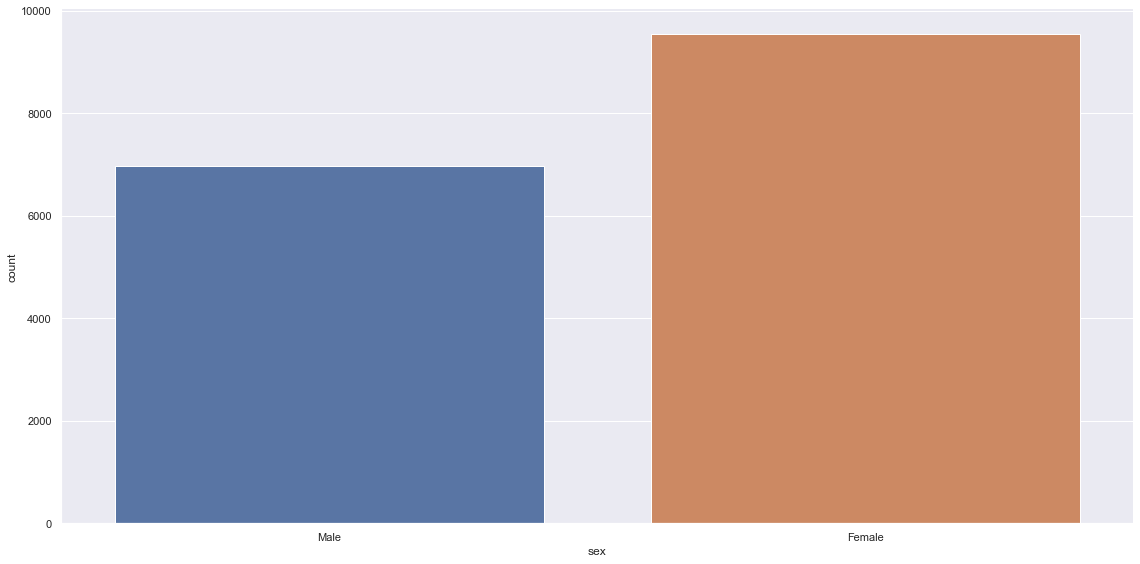

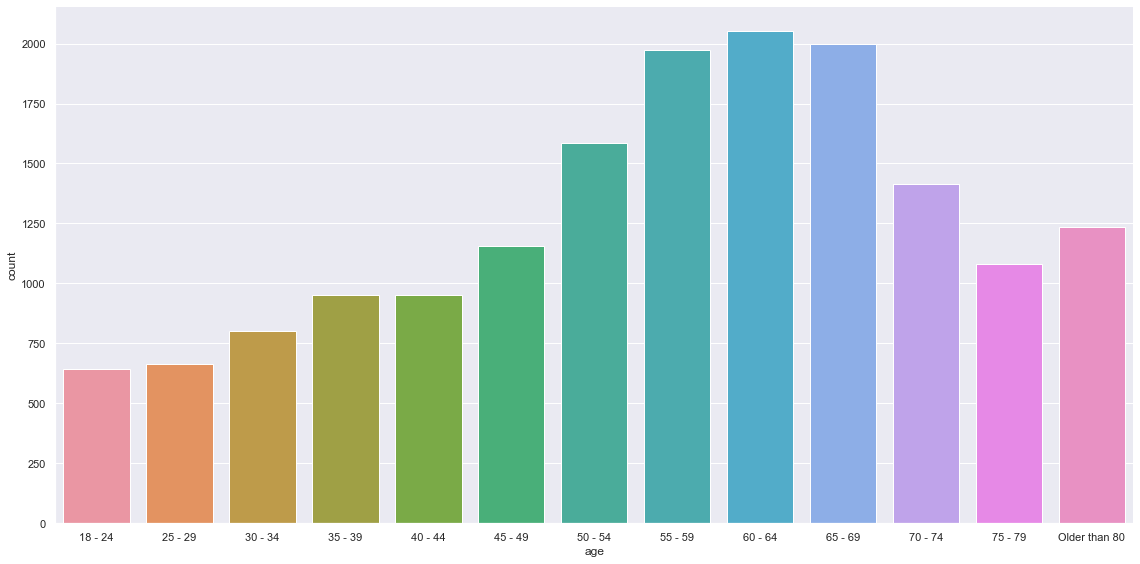

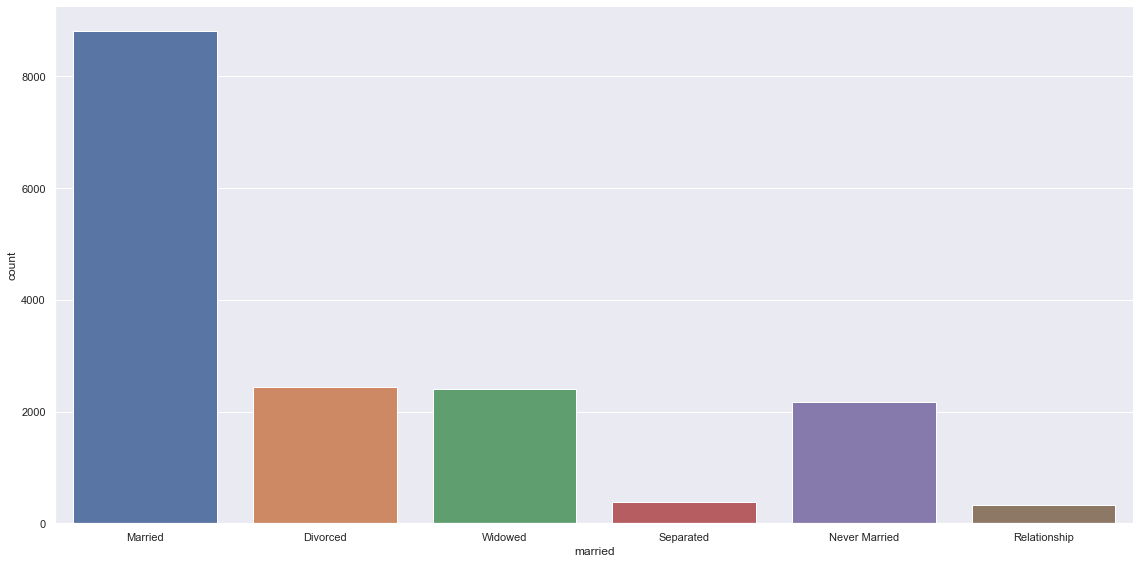

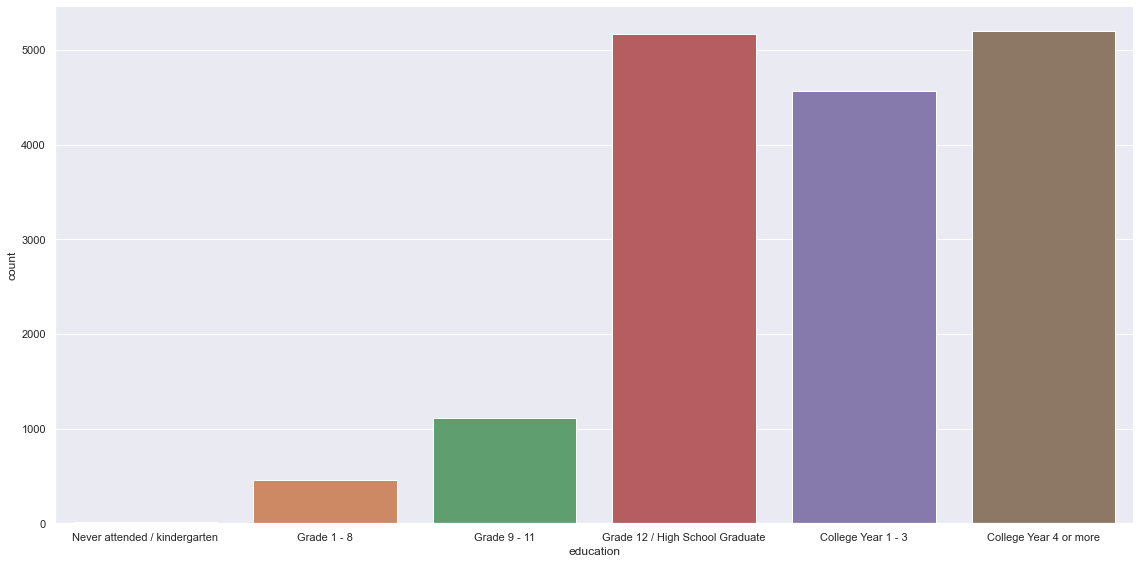

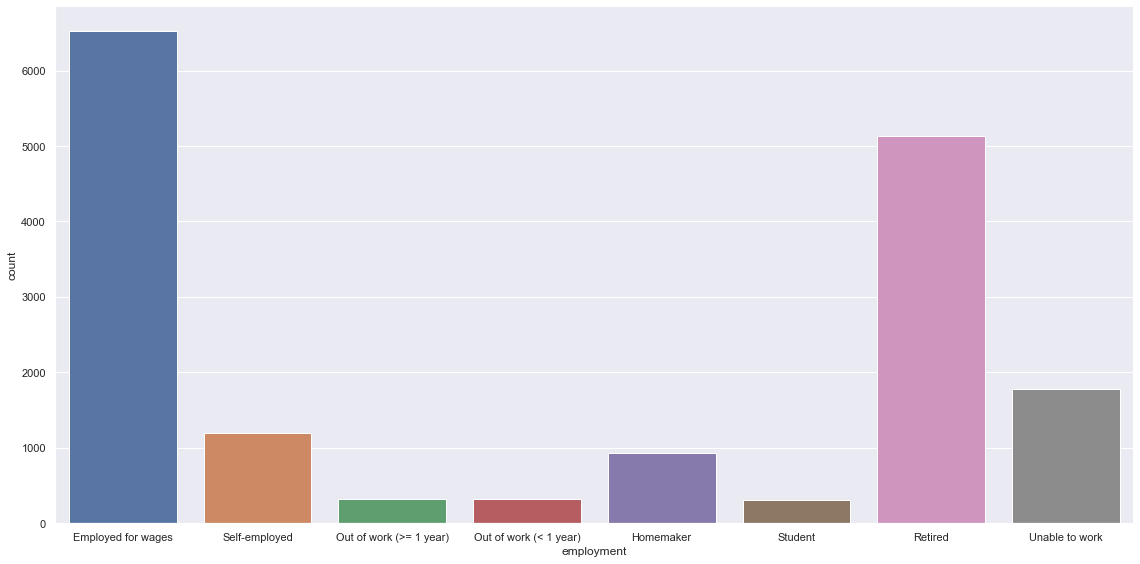

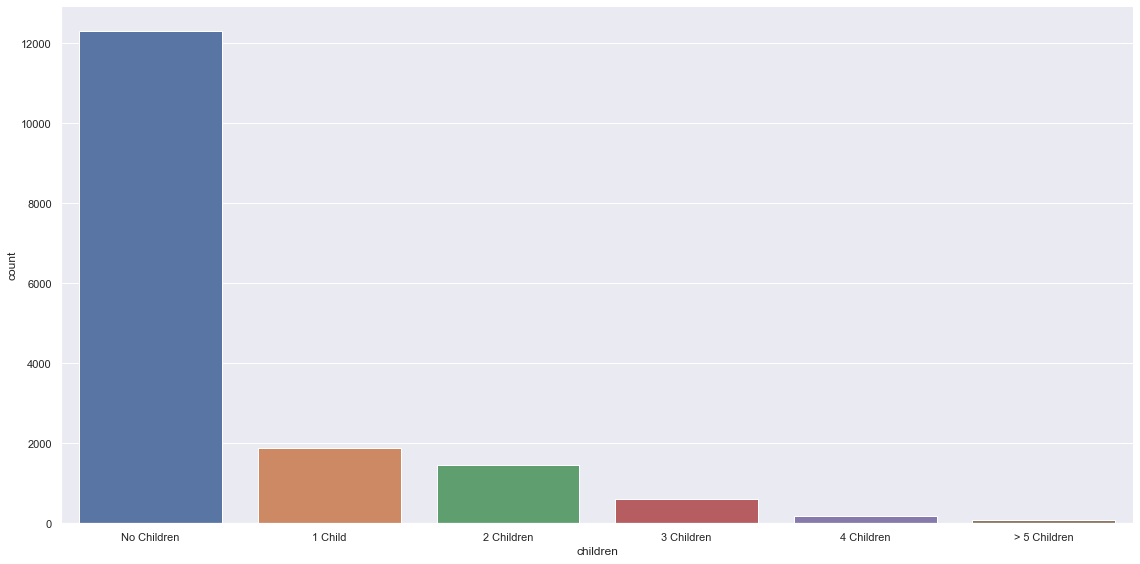

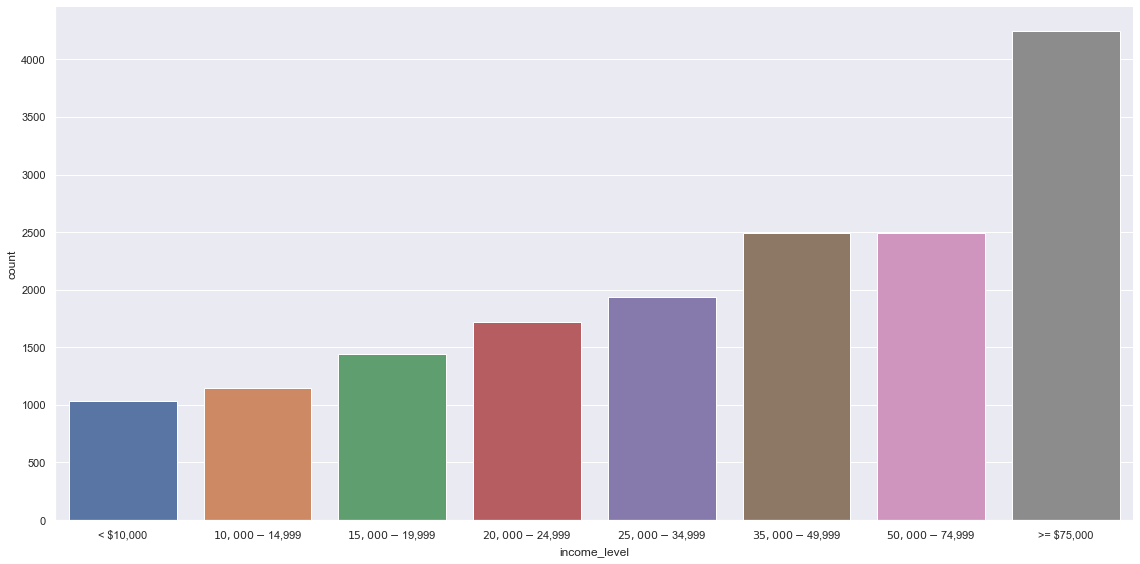

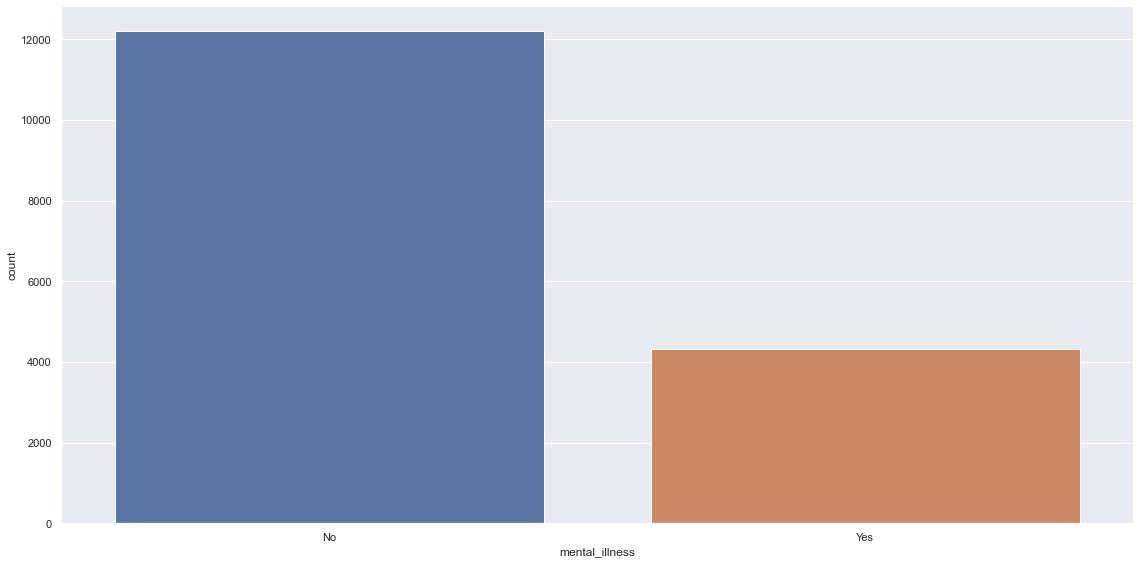

In [12]:
sb.catplot(x = 'sex', data = MentalHealth_Data, kind = "count", height = 8, aspect = 2)
sb.catplot(x = 'age', data = MentalHealth_Data, kind = "count", height = 8, aspect = 2)
sb.catplot(x = 'married', data = MentalHealth_Data, kind = "count", height = 8, aspect = 2)
sb.catplot(x = 'education', data = MentalHealth_Data, kind = "count", height = 8, aspect = 2)
sb.catplot(x = 'employment', data = MentalHealth_Data, kind = "count", height = 8, aspect = 2)
sb.catplot(x = 'children', data = MentalHealth_Data, kind = "count", height = 8, aspect = 2)
sb.catplot(x = 'income_level', data = MentalHealth_Data, kind = "count", height = 8, aspect = 2)
sb.catplot(x = 'mental_illness', data = MentalHealth_Data, kind = "count", height = 8, aspect = 2)

## Potential reasons of why symptoms developed

In [35]:
mentalhealth_insights = pd.DataFrame(csv_Data[['EMPLOY1', 'VETERAN3', 'INCOME2', 'CHILDREN', 'INTERNET']])

In [36]:
mentalhealth_insights

,EMPLOY1,VETERAN3,INCOME2,CHILDREN,INTERNET
0,8.0,2.0,3.0,88.0,2.0
1,3.0,2.0,1.0,88.0,1.0
2,7.0,2.0,99.0,88.0,2.0
3,8.0,2.0,8.0,1.0,2.0
4,8.0,2.0,77.0,88.0,1.0
...,...,...,...,...,...
441451,7.0,2.0,4.0,88.0,2.0
441452,1.0,2.0,2.0,1.0,1.0
441453,7.0,2.0,5.0,88.0,2.0
441454,3.0,2.0,1.0,88.0,2.0


In [37]:
# Rename Columns
cols = ['employment', 'veteran', 'income', 'children', 'internet']

mentalhealth_insights.columns = cols

In [38]:
#mentalhealth_insights["veteran"] = pd.to_numeric(mentalhealth_insights["veteran"])
#mentalhealth_insights["internet"] = pd.to_numeric(mentalhealth_insights["internet"])

# 1 - Yes, 2 - No
mentalhealth_insights['veteran'] = np.where(mentalhealth_insights['veteran'] < 2, 'Yes', 'No')
# Combine refused and unsure to 7
mentalhealth_insights.loc[mentalhealth_insights.veteran == 9, 'veteran'] = 99
mentalhealth_insights.loc[mentalhealth_insights.veteran == 7, 'veteran'] = 99

# Combine refused and unsure to 77
mentalhealth_insights.loc[mentalhealth_insights.income == 77, 'income'] = 99
#mentalhealth_insights.loc[mentalhealth_insights.income == 99, 'income'] = 99

# 88 - 0 Children
mentalhealth_insights.loc[mentalhealth_insights.children == 88, 'children'] = 0

# 1 - Yes, 2 - No
mentalhealth_insights['internet'] = np.where(mentalhealth_insights['internet'] < 2, 'Yes', 'No')
# Remove 9 - Refused and 7 - Unsure
mentalhealth_insights.loc[mentalhealth_insights.internet == 9, 'internet'] = 99
mentalhealth_insights.loc[mentalhealth_insights.internet == 7, 'internet'] = 99

In [39]:
MentalHealth_Demo = MentalHealth_Data.copy()
MentalHealth_Demo = MentalHealth_Demo.join(mentalhealth_insights)

In [40]:
MentalHealth_Demo

,little_pleasure,down_or_depressed,sleep_troubles,tired,eating_habits,failure,concentration,slow_or_restless,on_medication,mental_health,stressed_abt_rent,stressed_abt_food,alcohol,mental_illness,employment,veteran,income,children,internet
209337,No,No,Yes,No,No,No,Yes,No,No,No,Yes,No,No,No,1.0,No,7.0,2.0,Yes
209338,No,No,No,No,No,No,No,No,No,No,No,No,No,No,7.0,No,8.0,0.0,Yes
209339,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,7.0,Yes,7.0,0.0,No
209343,No,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,Yes,5.0,No,8.0,0.0,Yes
209344,No,No,No,No,No,No,No,No,No,No,No,No,No,No,7.0,No,3.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359363,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,No,No,3.0,No,99.0,5.0,No
359364,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,7.0,No,99.0,0.0,Yes
359366,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,1.0,No,6.0,1.0,Yes
359367,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Yes,No,Yes,6.0,No,4.0,3.0,Yes


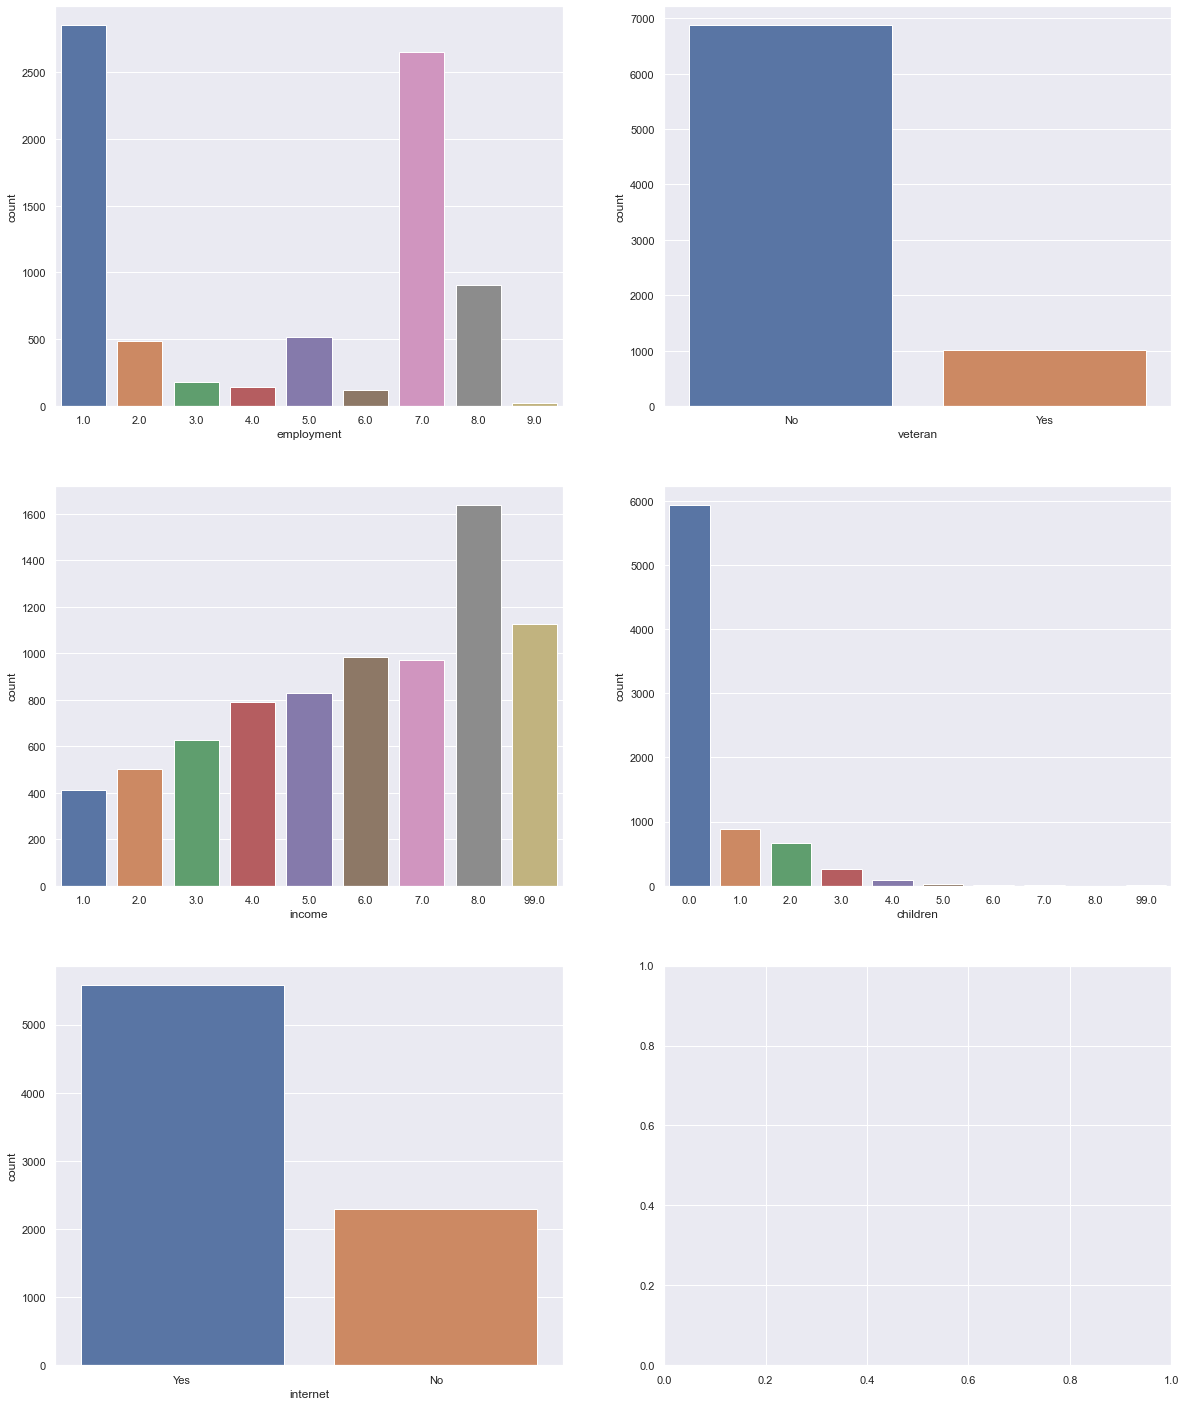

In [42]:
fig, ax = plt.subplots(3, 2, figsize=(20, 25))
for variable, subplot in zip(cols, ax.flatten()):
    sb.countplot(x = variable, data = MentalHealth_Demo, ax=subplot)

Observations:
Majority of people with anxiety / depression are employed / retired.


## Which two symptoms has the strongest association?

In [25]:
MentallyIll_Data = MentalHealth_Data[(MentalHealth_Data.mental_illness != 'No')]

In [26]:
MentallyIll_Data

,little_pleasure,down_or_depressed,sleep_troubles,tired,eating_habits,failure,concentration,slow_or_restless,on_medication,mental_health,stressed_abt_rent,stressed_abt_food,alcohol,mental_illness
209343,No,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,Yes
209363,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
209372,No,Yes,No,Yes,No,No,No,No,No,Yes,No,No,No,Yes
209400,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
209401,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359340,No,No,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes
359346,No,No,Yes,No,No,No,No,Yes,No,Yes,No,No,No,Yes
359349,Yes,No,No,No,Yes,Yes,No,No,No,Yes,Yes,No,No,Yes
359350,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Yes


In [27]:
cols = list(MentallyIll_Data.columns)
cols.pop()

'mental_illness'

In [28]:
MentallyIll_Data = MentallyIll_Data[cols]
MentallyIll_Data

,little_pleasure,down_or_depressed,sleep_troubles,tired,eating_habits,failure,concentration,slow_or_restless,on_medication,mental_health,stressed_abt_rent,stressed_abt_food,alcohol
209343,No,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No
209363,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
209372,No,Yes,No,Yes,No,No,No,No,No,Yes,No,No,No
209400,No,No,No,No,No,No,No,No,No,No,No,No,No
209401,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359340,No,No,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No
359346,No,No,Yes,No,No,No,No,Yes,No,Yes,No,No,No
359349,Yes,No,No,No,Yes,Yes,No,No,No,Yes,Yes,No,No
359350,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No


In [29]:
from dython.nominal import identify_nominal_columns
from dython.nominal import associations

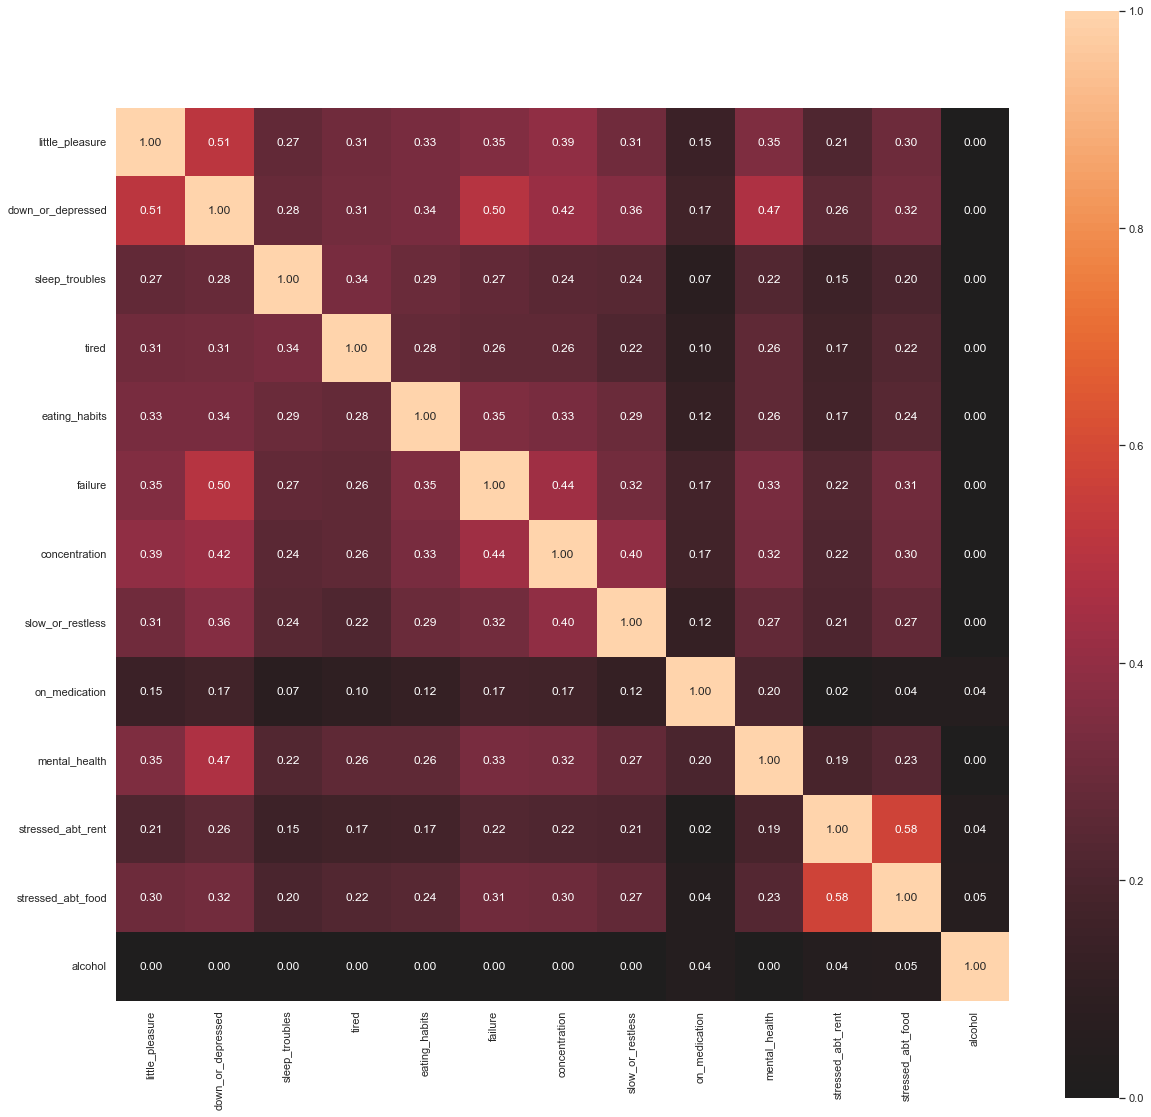

In [30]:
complete_correlation = associations(MentallyIll_Data, figsize=(20,20))

### Feeling down/depressed & having little pleasure
### Feeling like a failure and down/depressed
### Mental health not good & down/depressed
### Stressed about food & stressed about money

----
# Prevalence of unhealthy coping mechanisms

In [72]:
# Create Dataframe with Relevant Columns
MentalHealth_Data = pd.DataFrame(Data[['_SMOKER3', '_RFDRHV5', 'ADDEPEV2', 'ADANXEV']])
MentalHealth_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _SMOKER3  441456 non-null  float64
 1   _RFDRHV5  441456 non-null  float64
 2   ADDEPEV2  441456 non-null  float64
 3   ADANXEV   20342 non-null   float64
dtypes: float64(4)
memory usage: 13.5 MB


In [73]:
# Rename Columns
cols = ['smoker', 'alcoholic', 'diagnosed_depression', 'diagnosed_anxiety']
MentalHealth_Data.columns = cols

# Remove null rows
MentalHealth_Data = MentalHealth_Data.dropna()

In [74]:
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.smoker != 9)]
MentalHealth_Data = MentalHealth_Data[MentalHealth_Data.alcoholic != 9]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_depression != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_depression != 7)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_anxiety != 9)]
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.diagnosed_anxiety != 7)]
MentalHealth_Data['alcoholic'] = np.where(MentalHealth_Data['alcoholic'] < 2, 'No', 'Yes')

MentalHealth_Data = MentalHealth_Data.astype('category')

In [75]:
MentalHealth_Data['smoker'] = MentalHealth_Data['smoker'].cat.rename_categories({1: 'Current Smoker: Everyday', 
                                                                           2: 'Current Smoker: Occasionally', 
                                                                           3: 'Former Smoker', 4: 'Never Smoked'})
MentalHealth_Data['diagnosed_depression'] = MentalHealth_Data['diagnosed_depression'].cat.rename_categories({1: 'Yes', 2: 'No'})
MentalHealth_Data['diagnosed_anxiety'] = MentalHealth_Data['diagnosed_anxiety'].cat.rename_categories({1: 'Yes', 2: 'No'})

In [76]:
# If person has either depression or anxiety, mark as 'Yes' in new mental_illness column
MentalHealth_Data["mental_illness"] = np.nan
MentalHealth_Data['mental_illness'] = np.where(((MentalHealth_Data['diagnosed_depression'] == 'Yes') | 
                                               (MentalHealth_Data['diagnosed_anxiety'] == 'Yes')), 'Yes', 'No')
MentalHealth_Data = MentalHealth_Data.drop(columns=['diagnosed_depression', 'diagnosed_anxiety'])
MentalHealth_Data["mental_illness"] = MentalHealth_Data["mental_illness"].astype('category')

In [77]:
MentalHealth_Data = MentalHealth_Data[(MentalHealth_Data.mental_illness != 'No')]

In [78]:
MentalHealth_Data.describe()

,smoker,alcoholic,mental_illness
count,5025,5025,5025
unique,4,2,1
top,Never Smoked,No,Yes
freq,2223,4811,5025


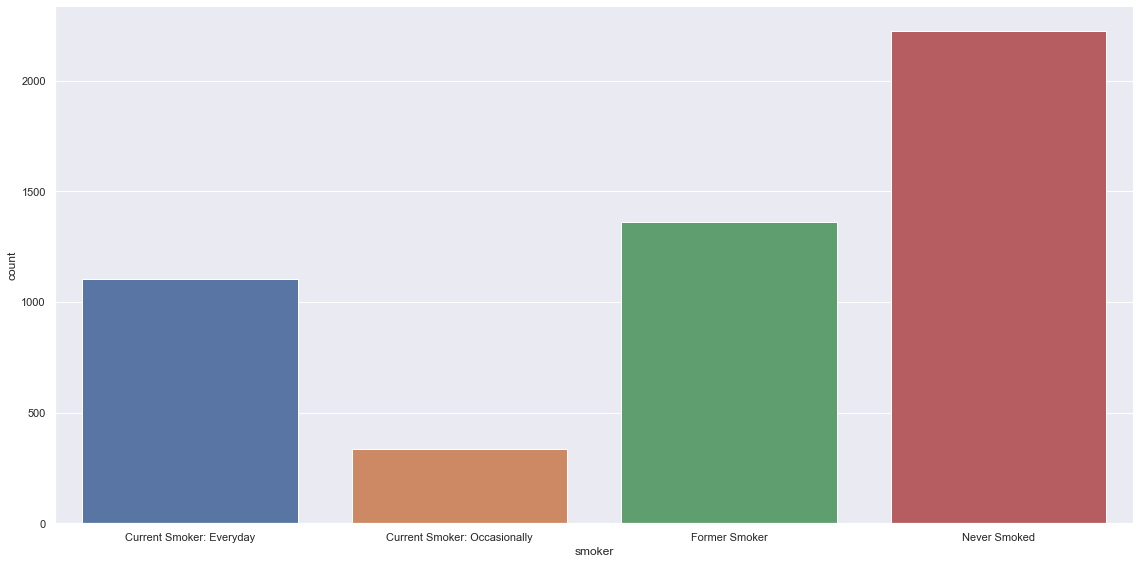

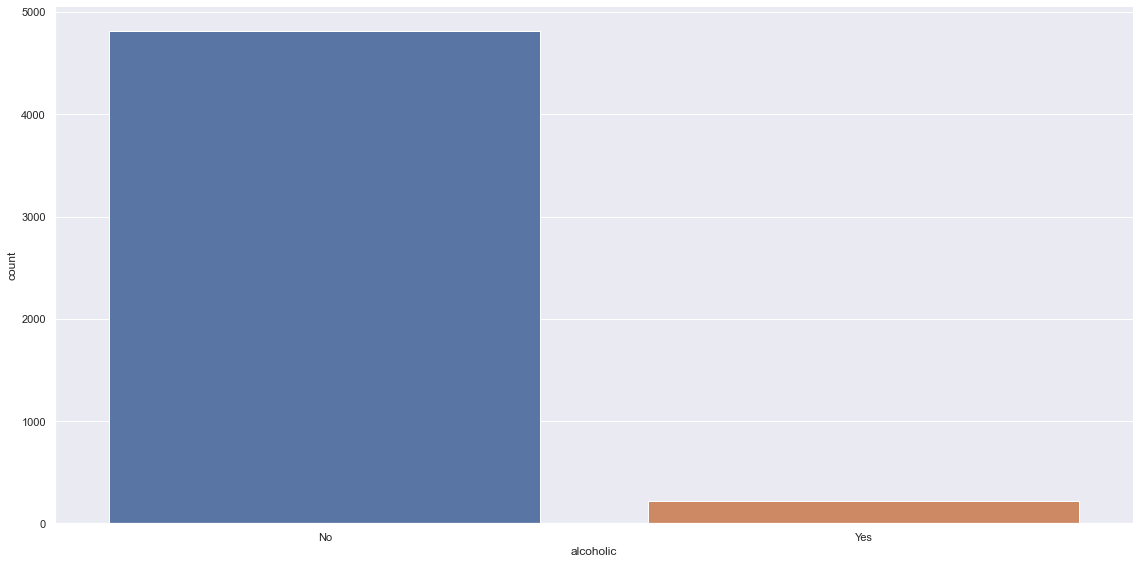

In [80]:
sb.catplot(x = 'smoker', data = MentalHealth_Data, kind = "count", height = 8, aspect = 2)
sb.catplot(x = 'alcoholic', data = MentalHealth_Data, kind = "count", height = 8, aspect = 2)

<AxesSubplot:xlabel='mental_illness', ylabel='Percent'>

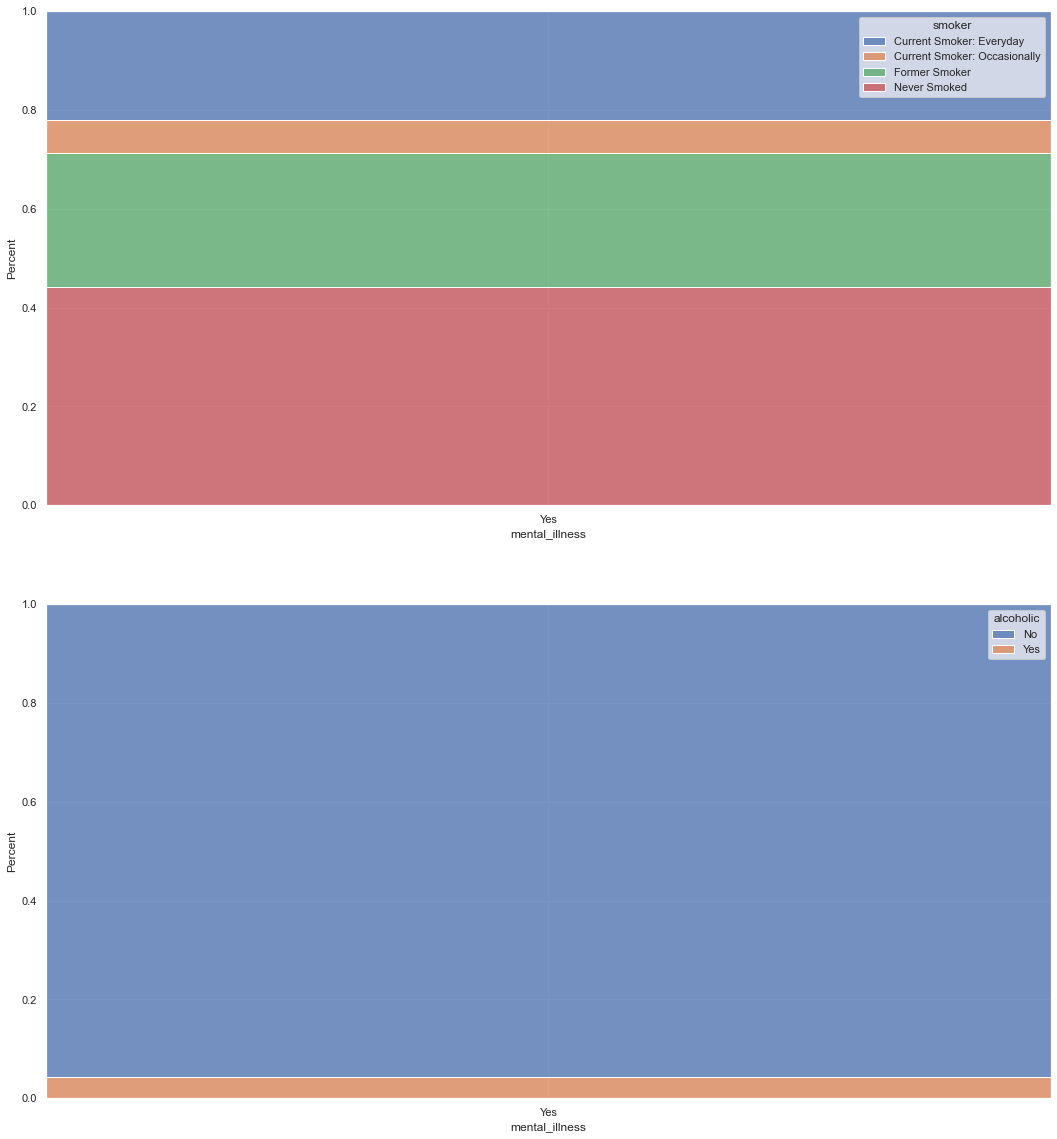

In [82]:
f, axes = plt.subplots(2, 1, figsize=(18, 20))
sb.histplot(MentalHealth_Data, x="mental_illness", hue="smoker", stat="percent", multiple="fill", shrink=.8, ax=axes[0])
sb.histplot(MentalHealth_Data, x="mental_illness", hue="alcoholic", stat="percent", multiple="fill", shrink=.8, ax=axes[1])